# PyMINEr

**Language:** Python

**Paper:** Tyler, S.R., et al., PyMINEr Finds Gene and Autocrine-Paracrine Networks from Human Islet scRNA-Seq. Cell Rep, 2019. 26(7): p. 1951-1964 e8.

**Code Resource:** https://www.sciencescott.com/pyminer

**Claiming:** Inference of intercellular (paracrine/autocrine) signaling networks

**Method:** The lists of significantly enriched genes encoding extracellular and membrane-associated proteins are obtained through gProfiler and then cross-referenced to the StringDB interaction list, and filtered to include only gene-gene pairs whose products are annotated as binding directly

**Database:** gProfiler tool (Reimand et al., 2016); StringDB file 9606.protein.actions.v10 (Szklarczyk et al., 2015)

## Input
1. scRNA-seq data: gene-expression matrix (typically log-transformed and normalized) with rows as genes and columns as cells
2. genes of interest

Here,we will use the sample data from https://www.sciencescott.com/pyminer

Gene-expression matrix:https://zenodo.org/record/5011490/files/airway_merged.txt?download=1

Genes of interest:https://zenodo.org/record/5011490/files/genes_of_interest.txt?download=1

## Installation
For better running and less problems, we can use the PyMINEr docker image instead like:

`docker pull scottyler89/pyminer

docker run -it --name first_try -v <path_to_data>:/data scottyler89/pyminer

cd /data/
`

To get the help of pyminer:

`
pyminer.py -h
`

## A Basic Example
Here is a basic example of how to use PyMINEr with a scRNAseq dataset using the default parameters.

`pyminer.py -i airway_merged.txt -goi genes_of_interest.txt -species mmusculus -ap_clust`

After the analysis, all the outputs will be saved to the *data* folder, we can explore the results with *PyMINEr_summary.html*

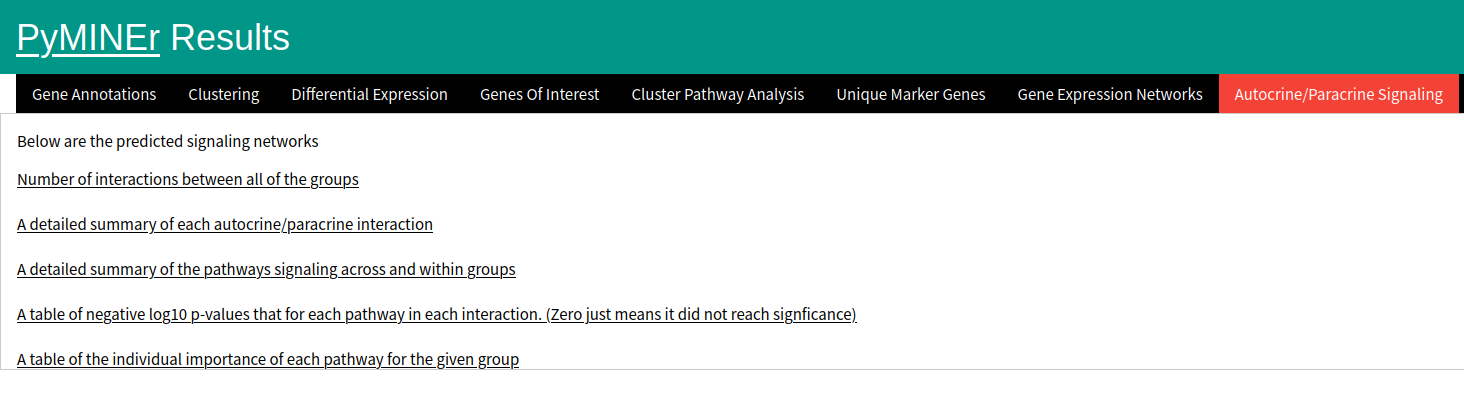

In [19]:
# Number of interactions between all of the groups
head(read.table("data/autocrine_paracrine_signaling/all_cell_cell_interaction_summary.tsv", header=TRUE))

,cell_type_1,cell_type_2,count
,<chr>,<chr>,<dbl>
1,bool_sample_group_0,bool_sample_group_0,432
2,bool_sample_group_0,bool_sample_group_1,425
3,bool_sample_group_0,bool_sample_group_2,411
4,bool_sample_group_0,bool_sample_group_3,274
5,bool_sample_group_0,bool_sample_group_4,208
6,bool_sample_group_0,bool_sample_group_5,430


In [26]:
# A detailed summary of each autocrine/paracrine interaction
head(read.table("data/autocrine_paracrine_signaling/all_cell_type_specific_interactions.tsv", sep ="\t", header=TRUE))

,autocrine_paracrine,cell_type_1,gene_1,gene_1_symbol,gene_1_location,cell_type_2,gene_2,gene_2_symbol,gene_2_location,gene1,gene2,activation.inhibition,other_action,action,inhibition,directional,is_direction,score
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,paracrine,bool_sample_group_2,ENSMUSP00000000001,GNAI3,plasma_membrane,bool_sample_group_4,ENSMUSP00000005406,APP,plasma_membrane,ENSMUSP00000000001,ENSMUSP00000005406,None,reaction,binding,,f,f,910
2,paracrine,bool_sample_group_2,ENSMUSP00000000001,GNAI3,plasma_membrane,bool_sample_group_5,ENSMUSP00000005406,APP,plasma_membrane,ENSMUSP00000000001,ENSMUSP00000005406,None,reaction,binding,,f,f,910
3,paracrine,bool_sample_group_2,ENSMUSP00000000001,GNAI3,plasma_membrane,bool_sample_group_6,ENSMUSP00000005406,APP,plasma_membrane,ENSMUSP00000000001,ENSMUSP00000005406,None,reaction,binding,,f,f,910
4,paracrine,bool_sample_group_5,ENSMUSP00000000001,GNAI3,plasma_membrane,bool_sample_group_4,ENSMUSP00000005406,APP,plasma_membrane,ENSMUSP00000000001,ENSMUSP00000005406,None,reaction,binding,,f,f,910
5,autocrine,bool_sample_group_5,ENSMUSP00000000001,GNAI3,plasma_membrane,bool_sample_group_5,ENSMUSP00000005406,APP,plasma_membrane,ENSMUSP00000000001,ENSMUSP00000005406,None,reaction,binding,,f,f,910
6,paracrine,bool_sample_group_5,ENSMUSP00000000001,GNAI3,plasma_membrane,bool_sample_group_6,ENSMUSP00000005406,APP,plasma_membrane,ENSMUSP00000000001,ENSMUSP00000005406,None,reaction,binding,,f,f,910


In [30]:
# A detailed summary of the pathways signaling across and within groups
head(read.table("data/autocrine_paracrine_signaling/all_cell_type_specific_interactions_gprofiler.tsv", sep ="\t", header=TRUE, comment.char = ""))

,cell_type_1,cell_type_2,X.,signf,p.value,T,Q,Q.T,Q.T.Q,Q.T.T,term.ID,t.type,t.group,t.name,t.depth,filtered_annotated_gene_list,Q.T.list
,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,bool_sample_group_0,bool_sample_group_0,1,True,9.97e-09,10,47,9,0.191,0.900,HP:0200125,hp,1,Mitochondrial respiratory chain defects,1,"bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND2,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-CO3;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND5;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-ATP6,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CO3","MT-ND1,MT-ND2,MT-CO1,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYTB,MT-ND4L"
2,bool_sample_group_0,bool_sample_group_0,1,True,1.14e-08,13,47,10,0.213,0.769,HP:0007924,hp,1,Slow decrease in visual acuity,1,"bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND2,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-CO3;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND5;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-ATP6,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CO3,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4L","CTNNB1,MT-ND1,MT-ND2,MT-CO1,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYTB,MT-ND4L"
3,bool_sample_group_0,bool_sample_group_0,1,True,1.14e-08,13,47,10,0.213,0.769,HP:0004309,hp,1,Ventricular preexcitation,1,"bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND2,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-CO2;bool_sample_group_0:MT-CO3,bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-CO3;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND5;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-ATP6,bool_sample_group_0:MT-CO2;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-CO2;bool_sample_group_0:MT-ATP6,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CO3,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CO2","MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYTB,MT-ND4L"
4,bool_sample_group_0,bool_sample_group_0,1,True,5.27e-08,11,47,9,0.191,0.818,HP:0007763,hp,1,Retinal telangiectasia,1,"bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND2,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-ND4;bool_sample_group_0:MT-ND5,bool_sample_group_0:MT-CO1;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND1;bool_sample_group_0:MT-ND4,bool_sample_group_0:MT-CO3;bool_sample_group_0:MT-CYTB,bool_sample_group_0:MT-ND5;bool_sample_group_0:MT-ND4L,bool_sample_group_0:MT-ND2;boo

In [32]:
# A table of negative log10 p-values that for each pathway in each interaction. (Zero just means it did not reach signficance)
head(read.table("data/autocrine_paracrine_signaling/combined_neg_log10p_gprofiler.tsv", sep ="\t", header=TRUE))

,importance_metric,term_id,source,term_name,bool_sample_group_0_._bool_sample_group_0,bool_sample_group_0_._bool_sample_group_1,bool_sample_group_0_._bool_sample_group_2,bool_sample_group_0_._bool_sample_group_3,bool_sample_group_0_._bool_sample_group_4,bool_sample_group_0_._bool_sample_group_5,⋯,bool_sample_group_3_._bool_sample_group_3,bool_sample_group_3_._bool_sample_group_4,bool_sample_group_3_._bool_sample_group_5,bool_sample_group_3_._bool_sample_group_6,bool_sample_group_4_._bool_sample_group_4,bool_sample_group_4_._bool_sample_group_5,bool_sample_group_4_._bool_sample_group_6,bool_sample_group_5_._bool_sample_group_5,bool_sample_group_5_._bool_sample_group_6,bool_sample_group_6_._bool_sample_group_6
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,GO:0031012,CC,extracellular matrix,0,0.000000,0,0,0,5.761954,⋯,0,0,1.464706,0,0,0.000000,0,31.66555,5.518557,0
2,0.7139430,REAC:R-MMU-1474244,rea,Extracellular matrix organization,0,1.385103,0,0,0,14.194499,⋯,0,0,3.301030,0,0,1.552842,0,26.93181,9.958607,0
3,0.6687199,GO:0044421,CC,extracellular region part,0,0.000000,0,0,0,7.749580,⋯,0,0,0.000000,0,0,1.761954,0,22.68403,4.525784,0
4,0.5786726,GO:0005576,CC,extracellular region,0,0.000000,0,0,0,9.341035,⋯,0,0,0.000000,0,0,0.000000,0,22.92445,5.679854,0
5,0.5732366,GO:0062023,CC,collagen-containing extracellular matrix,0,0.000000,0,0,0,3.408935,⋯,0,0,1.446117,0,0,0.000000,0,19.70553,5.448550,0
6,0.5547623,GO:0005581,CC,collagen trimer,0,0.000000,0,0,0,13.054039,⋯,0,0,2.754487,0,0,0.000000,0,19.72584,0.000000,0


In [33]:
# A table of the individual importance of each pathway for the given group
head(read.table("data/autocrine_paracrine_signaling/individual_class_importance.tsv", sep ="\t", header=TRUE))

,importance_metric,term_id,source,term_name,bool_sample_group_0_._bool_sample_group_0,bool_sample_group_0_._bool_sample_group_1,bool_sample_group_0_._bool_sample_group_2,bool_sample_group_0_._bool_sample_group_3,bool_sample_group_0_._bool_sample_group_4,bool_sample_group_0_._bool_sample_group_5,⋯,bool_sample_group_3_._bool_sample_group_3,bool_sample_group_3_._bool_sample_group_4,bool_sample_group_3_._bool_sample_group_5,bool_sample_group_3_._bool_sample_group_6,bool_sample_group_4_._bool_sample_group_4,bool_sample_group_4_._bool_sample_group_5,bool_sample_group_4_._bool_sample_group_6,bool_sample_group_5_._bool_sample_group_5,bool_sample_group_5_._bool_sample_group_6,bool_sample_group_6_._bool_sample_group_6
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,GO:0098644,CC,complex of collagen trimers,0.0000000,0.0000000,0,0.0000000,0,0,⋯,0.0000000,0.0000000,1.0000000,0,0,0.0000000,0,0.09604619,0,0
2,0.9987209,KEGG:04141,keg,Protein processing in endoplasmic reticulum,0.0000000,0.0000000,0,0.0000000,0,0,⋯,0.0000000,1.0000000,0.0000000,1,1,0.0000000,1,0.00000000,0,1
3,0.9621371,HP:0200125,hp,Mitochondrial respiratory chain defects,1.0000000,0.0000000,0,0.8362629,0,0,⋯,0.1408365,0.2262126,0.0000000,0,0,0.0000000,0,0.00000000,0,0
4,0.9432265,HP:0004309,hp,Ventricular preexcitation,0.9806826,0.0000000,0,0.7908947,0,0,⋯,0.1870815,0.0000000,0.0000000,0,0,0.0000000,0,0.00000000,0,0
5,0.9084885,REAC:R-MMU-1474244,rea,Extracellular matrix organization,0.0000000,0.3037417,0,0.0000000,0,1,⋯,0.0000000,0.0000000,0.7272345,0,0,0.3750567,0,0.60721453,1,0
6,0.8975995,GO:0044441,CC,ciliary part,0.0000000,0.0000000,0,0.0000000,0,0,⋯,1.0000000,0.0000000,0.1788129,0,0,0.0000000,0,0.00000000,0,0


Last updated: June 12,2021